In [1]:
import pandas as pd

# Load datasets
completed_orders = pd.read_csv('data/completed_orders.csv')
delivery_requests = pd.read_csv('data/driver_locations_during_request.csv')
weather = pd.read_csv('data/weather_data.csv')
calendar = pd.read_csv('data/holiday_data.csv')

In [2]:
# Create a new column for the date part of Trip Start Time
completed_orders['Trip Date'] = pd.to_datetime(completed_orders['Trip Start Time']).dt.date

# Merge completed_orders with delivery_requests
data = pd.merge(completed_orders, delivery_requests, left_on='Trip ID', right_on='order_id')

# Create a date column in data for merging with weather and calendar
data['Trip Date'] = pd.to_datetime(data['Trip Start Time']).dt.date

# Convert 'date' columns in weather and calendar to datetime
weather['date'] = pd.to_datetime(weather['date']).dt.date
calendar['date'] = pd.to_datetime(calendar['date'], utc=True).dt.date

# Merge with weather data on date
data = pd.merge(data, weather, left_on='Trip Date', right_on='date')

# Merge with calendar data on date
data = pd.merge(data, calendar, left_on='Trip Date', right_on='date')

# Inspect the merged dataset
print(data.head())

   Trip ID                      Trip Origin     Trip Destination  \
0   394447  6.4371758130759,3.5097476821616  6.4430658,3.5380258   
1   394447  6.4371758130759,3.5097476821616  6.4430658,3.5380258   
2   394447  6.4371758130759,3.5097476821616  6.4430658,3.5380258   
3   394447  6.4371758130759,3.5097476821616  6.4430658,3.5380258   
4   394447  6.4371758130759,3.5097476821616  6.4430658,3.5380258   

       Trip Start Time        Trip End Time   Trip Date     id  order_id  \
0  2021-12-28 18:16:31  2021-07-01 13:05:02  2021-12-28  51888    394447   
1  2021-12-28 18:16:31  2021-07-01 13:05:02  2021-12-28  51889    394447   
2  2021-12-28 18:16:31  2021-07-01 13:05:02  2021-12-28  51890    394447   
3  2021-12-28 18:16:31  2021-07-01 13:05:02  2021-12-28  51891    394447   
4  2021-12-28 18:16:31  2021-07-01 13:05:02  2021-12-28  51892    394447   

   driver_id driver_action       lat       lng  created_at  updated_at  \
0     243773      accepted  6.435905  3.493106         NaN  

In [3]:
# Create features like trip duration, distance travelled etc.
data['Trip Start Time'] = pd.to_datetime(data['Trip Start Time'])
data['Trip End Time'] = pd.to_datetime(data['Trip End Time'])
data['trip_duration'] = (data['Trip End Time'] - data['Trip Start Time']).dt.total_seconds() / 60  # Duration in minutes

data.head()

,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time,Trip Date,id,order_id,driver_id,driver_action,...,lng,created_at,updated_at,date_x,temperature,rain,date_y,name,type,trip_duration
0,394447,"6.4371758130759,3.5097476821616","6.4430658,3.5380258",2021-12-28 18:16:31,2021-07-01 13:05:02,2021-12-28,51888,394447,243773,accepted,...,3.493106,NaN,NaN,2021-12-28,29.3,0.0,2021-12-28,Day off for Boxing Day,National holiday,-259511.483333
1,394447,"6.4371758130759,3.5097476821616","6.4430658,3.5380258",2021-12-28 18:16:31,2021-07-01 13:05:02,2021-12-28,51889,394447,243863,rejected,...,3.500062,NaN,NaN,2021-12-28,29.3,0.0,2021-12-28,Day off for Boxing Day,National holiday,-259511.483333
2,394447,"6.4371758130759,3.5097476821616","6.4430658,3.5380258",2021-12-28 18:16:31,2021-07-01 13:05:02,2021-12-28,51890,394447,244109,rejected,...,3.503248,NaN,NaN,2021-12-28,29.3,0.0,2021-12-28,Day off for Boxing Day,National holiday,-259511.483333
3,394447,"6.4371758130759,3.5097476821616","6.4430658,3.5380258",2021-12-28 18:16:31,2021-07-01 13:05:02,2021-12-28,51891,394447,243966,rejected,...,3.502685,NaN,NaN,2021-12-28,29.3,0.0,2021-12-28,Day off for Boxing Day,National holiday,-259511.483333
4,394447,"6.4371758130759,3.5097476821616","6.4430658,3.5380258",2021-12-28 18:16:31,2021-07-01 13:05:02,2021-12-28,51892,394447,243827,rejected,...,3.508620,NaN,NaN,2021-12-28,29.3,0.0,2021-12-28,Day off for Boxing Day,National holiday,-259511.483333


In [4]:
from scripts.feature_engineering import extract_features

data = extract_features(df=data)
# Inspect the dataset with new features
print(data.head())

   Trip ID                      Trip Origin     Trip Destination  \
0   394447  6.4371758130759,3.5097476821616  6.4430658,3.5380258   
1   394447  6.4371758130759,3.5097476821616  6.4430658,3.5380258   
2   394447  6.4371758130759,3.5097476821616  6.4430658,3.5380258   
3   394447  6.4371758130759,3.5097476821616  6.4430658,3.5380258   
4   394447  6.4371758130759,3.5097476821616  6.4430658,3.5380258   

      Trip Start Time       Trip End Time   Trip Date     id  order_id  \
0 2021-12-28 18:16:31 2021-07-01 13:05:02  2021-12-28  51888    394447   
1 2021-12-28 18:16:31 2021-07-01 13:05:02  2021-12-28  51889    394447   
2 2021-12-28 18:16:31 2021-07-01 13:05:02  2021-12-28  51890    394447   
3 2021-12-28 18:16:31 2021-07-01 13:05:02  2021-12-28  51891    394447   
4 2021-12-28 18:16:31 2021-07-01 13:05:02  2021-12-28  51892    394447   

   driver_id driver_action  ...              type  trip_duration  \
0     243773      accepted  ...  National holiday -259511.483333   
1     2438

In [5]:
import numpy as np

# Encode categorical variables
# data = pd.get_dummies(data, columns=['type'], drop_first=True)

# Define unfulfilled requests as target variable
data['unfulfilled_request'] = np.where(data['driver_action'] == 'unfulfilled', 1, 0)

# Inspect the merged dataset
print(data.head())

   Trip ID                      Trip Origin     Trip Destination  \
0   394447  6.4371758130759,3.5097476821616  6.4430658,3.5380258   
1   394447  6.4371758130759,3.5097476821616  6.4430658,3.5380258   
2   394447  6.4371758130759,3.5097476821616  6.4430658,3.5380258   
3   394447  6.4371758130759,3.5097476821616  6.4430658,3.5380258   
4   394447  6.4371758130759,3.5097476821616  6.4430658,3.5380258   

      Trip Start Time       Trip End Time   Trip Date     id  order_id  \
0 2021-12-28 18:16:31 2021-07-01 13:05:02  2021-12-28  51888    394447   
1 2021-12-28 18:16:31 2021-07-01 13:05:02  2021-12-28  51889    394447   
2 2021-12-28 18:16:31 2021-07-01 13:05:02  2021-12-28  51890    394447   
3 2021-12-28 18:16:31 2021-07-01 13:05:02  2021-12-28  51891    394447   
4 2021-12-28 18:16:31 2021-07-01 13:05:02  2021-12-28  51892    394447   

   driver_id driver_action  ...  trip_duration  Trip Origin Lat  \
0     243773      accepted  ... -259511.483333         6.437176   
1     243863

In [6]:
from sklearn.model_selection import train_test_split

# Split data into training (70%) and hold-out set (30%)
train_data, holdout_data = train_test_split(data, test_size=0.3, random_state=42)

print("Training Data Shape:", train_data.shape)
print("Holdout Data Shape:", holdout_data.shape)


Training Data Shape: (1415, 30)
Holdout Data Shape: (607, 30)


In [34]:
from causalnex.structure import StructureModel
from causalnex.structure.notears import from_pandas
from causalnex.network import BayesianNetwork
import matplotlib.pyplot as plt
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
import codecs

# Select features for causal graph
features = ['trip_duration', 'trip_distance','temperature']

# Create causal graph
sm = from_pandas(train_data[features], w_threshold=0.8)

# Visualize the causal graph
viz = plot_structure(
    sm,
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)

# Extract the HTML content
html_content = viz.generate_html()

# Save the HTML content with UTF-8 encoding
with codecs.open('causal_graph_full.html', 'w', encoding='utf-8') as file:
    file.write(html_content)

#open the file in the default web browser
import webbrowser
webbrowser.open('causal_graph_full.html')


c:\10x\logistic-optimization\.venv\lib\site-packages\scipy\linalg\_matfuncs.py:358: RuntimeWarning: overflow encountered in matmul
  eAw = eAw @ eAw
c:\10x\logistic-optimization\.venv\lib\site-packages\causalnex\structure\notears.py:407: RuntimeWarning: invalid value encountered in multiply
  obj_grad = loss_grad + (rho * (np.trace(E) - d) + alpha) * E.T * W * 2
c:\10x\logistic-optimization\.venv\lib\site-packages\causalnex\structure\notears.py:436: UserWarning: Failed to converge. Consider increasing max_iter.
  warnings.warn("Failed to converge. Consider increasing max_iter.")


True

In [36]:

# Convert to Bayesian Network for further analysis
bn = BayesianNetwork(sm)

# Display learned structure
sm.edges()

OutEdgeView([('trip_distance', 'trip_duration'), ('temperature', 'trip_duration')])

c:\10x\logistic-optimization\.venv\lib\site-packages\scipy\linalg\_matfuncs.py:358: RuntimeWarning: overflow encountered in matmul
  eAw = eAw @ eAw
c:\10x\logistic-optimization\.venv\lib\site-packages\causalnex\structure\notears.py:407: RuntimeWarning: invalid value encountered in multiply
  obj_grad = loss_grad + (rho * (np.trace(E) - d) + alpha) * E.T * W * 2
c:\10x\logistic-optimization\.venv\lib\site-packages\causalnex\structure\notears.py:436: UserWarning: Failed to converge. Consider increasing max_iter.
  warnings.warn("Failed to converge. Consider increasing max_iter.")
c:\10x\logistic-optimization\.venv\lib\site-packages\scipy\linalg\_matfuncs.py:358: RuntimeWarning: overflow encountered in matmul
  eAw = eAw @ eAw
c:\10x\logistic-optimization\.venv\lib\site-packages\causalnex\structure\notears.py:407: RuntimeWarning: invalid value encountered in multiply
  obj_grad = loss_grad + (rho * (np.trace(E) - d) + alpha) * E.T * W * 2
c:\10x\logistic-optimization\.venv\lib\site-packa

Fraction: 0.1, Jaccard Index: 1.0000
Fraction: 0.2, Jaccard Index: 1.0000


c:\10x\logistic-optimization\.venv\lib\site-packages\causalnex\structure\notears.py:436: UserWarning: Failed to converge. Consider increasing max_iter.
  warnings.warn("Failed to converge. Consider increasing max_iter.")
c:\10x\logistic-optimization\.venv\lib\site-packages\scipy\linalg\_matfuncs.py:358: RuntimeWarning: overflow encountered in matmul
  eAw = eAw @ eAw
c:\10x\logistic-optimization\.venv\lib\site-packages\causalnex\structure\notears.py:407: RuntimeWarning: invalid value encountered in multiply
  obj_grad = loss_grad + (rho * (np.trace(E) - d) + alpha) * E.T * W * 2
c:\10x\logistic-optimization\.venv\lib\site-packages\causalnex\structure\notears.py:436: UserWarning: Failed to converge. Consider increasing max_iter.
  warnings.warn("Failed to converge. Consider increasing max_iter.")
c:\10x\logistic-optimization\.venv\lib\site-packages\scipy\linalg\_matfuncs.py:358: RuntimeWarning: overflow encountered in matmul
  eAw = eAw @ eAw
c:\10x\logistic-optimization\.venv\lib\site-

Fraction: 0.3, Jaccard Index: 1.0000
Fraction: 0.4, Jaccard Index: 1.0000


c:\10x\logistic-optimization\.venv\lib\site-packages\causalnex\structure\notears.py:436: UserWarning: Failed to converge. Consider increasing max_iter.
  warnings.warn("Failed to converge. Consider increasing max_iter.")


Fraction: 0.5, Jaccard Index: 1.0000


c:\10x\logistic-optimization\.venv\lib\site-packages\scipy\linalg\_matfuncs.py:358: RuntimeWarning: overflow encountered in matmul
  eAw = eAw @ eAw
c:\10x\logistic-optimization\.venv\lib\site-packages\causalnex\structure\notears.py:407: RuntimeWarning: invalid value encountered in multiply
  obj_grad = loss_grad + (rho * (np.trace(E) - d) + alpha) * E.T * W * 2
c:\10x\logistic-optimization\.venv\lib\site-packages\causalnex\structure\notears.py:436: UserWarning: Failed to converge. Consider increasing max_iter.
  warnings.warn("Failed to converge. Consider increasing max_iter.")
c:\10x\logistic-optimization\.venv\lib\site-packages\scipy\linalg\_matfuncs.py:358: RuntimeWarning: overflow encountered in matmul
  eAw = eAw @ eAw
c:\10x\logistic-optimization\.venv\lib\site-packages\causalnex\structure\notears.py:407: RuntimeWarning: invalid value encountered in multiply
  obj_grad = loss_grad + (rho * (np.trace(E) - d) + alpha) * E.T * W * 2


Fraction: 0.6, Jaccard Index: 1.0000


c:\10x\logistic-optimization\.venv\lib\site-packages\causalnex\structure\notears.py:436: UserWarning: Failed to converge. Consider increasing max_iter.
  warnings.warn("Failed to converge. Consider increasing max_iter.")
c:\10x\logistic-optimization\.venv\lib\site-packages\scipy\linalg\_matfuncs.py:358: RuntimeWarning: overflow encountered in matmul
  eAw = eAw @ eAw
c:\10x\logistic-optimization\.venv\lib\site-packages\causalnex\structure\notears.py:407: RuntimeWarning: invalid value encountered in multiply
  obj_grad = loss_grad + (rho * (np.trace(E) - d) + alpha) * E.T * W * 2
c:\10x\logistic-optimization\.venv\lib\site-packages\causalnex\structure\notears.py:436: UserWarning: Failed to converge. Consider increasing max_iter.
  warnings.warn("Failed to converge. Consider increasing max_iter.")


Fraction: 0.7, Jaccard Index: 1.0000
Fraction: 0.8, Jaccard Index: 1.0000


c:\10x\logistic-optimization\.venv\lib\site-packages\scipy\linalg\_matfuncs.py:358: RuntimeWarning: overflow encountered in matmul
  eAw = eAw @ eAw
c:\10x\logistic-optimization\.venv\lib\site-packages\causalnex\structure\notears.py:407: RuntimeWarning: invalid value encountered in multiply
  obj_grad = loss_grad + (rho * (np.trace(E) - d) + alpha) * E.T * W * 2
c:\10x\logistic-optimization\.venv\lib\site-packages\causalnex\structure\notears.py:436: UserWarning: Failed to converge. Consider increasing max_iter.
  warnings.warn("Failed to converge. Consider increasing max_iter.")


Fraction: 0.9, Jaccard Index: 1.0000
Graph stabilizes at: 0.2


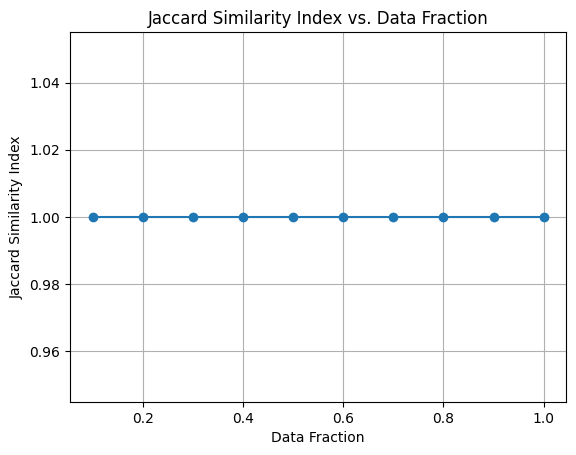

In [37]:
import numpy as np
from causalnex.structure.notears import from_pandas
from sklearn.model_selection import train_test_split
import networkx as nx

# Function to calculate Jaccard Similarity Index
def jaccard_similarity(graph1, graph2):
    edges1 = set(graph1.edges())
    edges2 = set(graph2.edges())
    intersection = len(edges1 & edges2)
    union = len(edges1 | edges2)
    return intersection / union

# Create causal graph with full training data
full_graph = from_pandas(train_data[features], w_threshold=0.8, max_iter=100)

# Initialize lists to store fractions and Jaccard indices
fractions = np.arange(0.1, 1.0, 0.1)  # Avoid using 1.0 to prevent error
jaccard_indices = []

# Incrementally create causal graphs
for fraction in fractions:
    subset_data, _ = train_test_split(train_data, train_size=fraction, random_state=42)
    try:
        subset_graph = from_pandas(subset_data[features], w_threshold=0.8, max_iter=100)
        jaccard_index = jaccard_similarity(full_graph, subset_graph)
        jaccard_indices.append(jaccard_index)
        print(f"Fraction: {fraction:.1f}, Jaccard Index: {jaccard_index:.4f}")
    except Exception as e:
        print(f"Fraction: {fraction:.1f}, Error: {str(e)}")
        jaccard_indices.append(np.nan)

# Add Jaccard Index for the full data
jaccard_indices.append(1.0)

# Determine at which point the graph stabilizes
stable_fraction = fractions[np.argmax(np.diff(jaccard_indices, prepend=np.nan) < 0.01)]  # Fraction where the graph stabilizes
print(f"Graph stabilizes at: {stable_fraction:.1f}")

# Plot Jaccard Similarity Index vs. Data Fraction
import matplotlib.pyplot as plt

plt.plot(np.append(fractions, 1.0), jaccard_indices, marker='o')
plt.xlabel('Data Fraction')
plt.ylabel('Jaccard Similarity Index')
plt.title('Jaccard Similarity Index vs. Data Fraction')
plt.grid(True)
plt.show()

In [38]:
# Create the stable causal graph
stable_data, _ = train_test_split(train_data, train_size=stable_fraction, random_state=42)
stable_graph = from_pandas(stable_data[features], w_threshold=0.8)

# Convert to Bayesian Network
bn = BayesianNetwork(stable_graph)

# Select direct causes of the target variable 'unfulfilled_request'
direct_causes = list(stable_graph.predecessors('trip_duration'))
print(f"Direct causes of 'trip_duration': {direct_causes}")


Direct causes of 'trip_duration': ['trip_distance', 'temperature']


c:\10x\logistic-optimization\.venv\lib\site-packages\scipy\linalg\_matfuncs.py:358: RuntimeWarning: overflow encountered in matmul
  eAw = eAw @ eAw
c:\10x\logistic-optimization\.venv\lib\site-packages\causalnex\structure\notears.py:407: RuntimeWarning: invalid value encountered in multiply
  obj_grad = loss_grad + (rho * (np.trace(E) - d) + alpha) * E.T * W * 2
c:\10x\logistic-optimization\.venv\lib\site-packages\causalnex\structure\notears.py:436: UserWarning: Failed to converge. Consider increasing max_iter.
  warnings.warn("Failed to converge. Consider increasing max_iter.")


In [51]:
from causalnex.network import BayesianNetwork
from causalnex.structure.notears import from_pandas
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
import matplotlib.pyplot as plt
from causalnex.inference import InferenceEngine

# Function to fit CPDs to the Bayesian Network
def fit_cpds(bn, data, method="BayesianEstimator"):
    from causalnex.network import BayesianNetwork
    bn = BayesianNetwork(bn)
    bn.fit_node_states_and_cpds(data, method=method, bayes_prior='K2')
    return bn

# Fit the CPDs to the Bayesian Network
bn = fit_cpds(stable_graph, stable_data[features])

# Initialize inference engine
ie = InferenceEngine(bn)

# Function to perform interventions and predict unfulfilled requests
def predict_unfulfilled_requests(intervention, evidence=None):
    ie.do_intervention(intervention)
    if evidence:
        ie.update_beliefs(evidence)
    prediction = ie.query()["unfulfilled_request"]
    ie.reset_do(intervention.keys())
    return prediction

print(ie.query()['trip_distance'])
# Business Questions:
# 1. Given drivers are recommended to move 1km every 30 mins in a selected direction, what happens to the number of unfulfilled requests?
intervention_1 = {'trip_distance': ie.query()['trip_distance'].mean() + 1}  # Assuming this is how we model the 1km movement
prediction_1 = predict_unfulfilled_requests(intervention_1)
print(f"Predicted unfulfilled requests after intervention 1: {prediction_1}")

# 2. If we assume we know the location of the next 20% of orders within 5km accuracy, what happens to the number of unfulfilled requests?
intervention_2 = {'trip_distance': ie.query()['trip_distance'].mean() + 5}  # Assuming 5km accuracy
prediction_2 = predict_unfulfilled_requests(intervention_2)
print(f"Predicted unfulfilled requests after intervention 2: {prediction_2}")

# 3. Had we changed the time requirements to drivers operating time in the past, what fractions of orders could have been completed?
# Assuming 'trip_duration' reflects operating time; we intervene on 'trip_duration'
intervention_3 = {'trip_duration': ie.query()['trip_duration'].mean() * 1.1}  # Example: increasing operating time by 10%
prediction_3 = predict_unfulfilled_requests(intervention_3)
print(f"Predicted unfulfilled requests after intervention 3: {prediction_3}")

# 4. If I increased the number of drivers by 10% cumulative per month, what fraction of orders can be completed?
# Assuming the number of drivers impacts 'trip_duration' and 'trip_distance'
intervention_4 = {'trip_duration': ie.query()['trip_duration'].mean() * 0.9, 'trip_distance': ie.query()['trip_distance'].mean() * 1.1}
prediction_4 = predict_unfulfilled_requests(intervention_4)
print(f"Predicted unfulfilled requests after intervention 4: {prediction_4}")


{0.5714540020630898: 0.05714285714285712, 0.8751911329136906: 0.012698412698412704, 0.9601505197424661: 0.08253968253968247, 1.3874171341655626: 0.06031746031746031, 1.6476017237150993: 0.07301587301587306, 1.9880528857358368: 0.009523809523809526, 2.0846164797377624: 0.022222222222222233, 2.7436373849913336: 0.02539682539682539, 2.9482363388339716: 0.03174603174603171, 3.195268386162073: 0.019047619047619032, 3.4612071320695543: 0.06984126984126984, 3.520767941000771: 0.022222222222222237, 3.657254298324889: 0.09523809523809526, 3.8716728840070562: 0.009523809523809528, 4.046217610105083: 0.009523809523809526, 4.0666370691508: 0.0126984126984127, 4.0672513906729: 0.009523809523809528, 6.0539947729024295: 0.03492063492063492, 6.406326928575699: 0.009523809523809526, 6.709082502681328: 0.01904761904761904, 6.848368269572274: 0.012698412698412702, 6.917992666360368: 0.012698412698412702, 8.082588179921704: 0.03174603174603173, 8.303972823652666: 0.0126984126984127, 9.496749195391764: 0.0

AttributeError: 'dict' object has no attribute 'mean'

In [21]:
# Select direct causes of the target variable 'unfulfilled_request'
direct_causes = list(stable_graph.predecessors('unfulfilled_request'))
print(f"Direct causes of 'unfulfilled_request': {direct_causes}")


NetworkXError: The node unfulfilled_request is not in the digraph.

In [25]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train-test split
X_train = train_data[features]
y_train = train_data['unfulfilled_request']
X_test = holdout_data[features]
y_test = holdout_data['unfulfilled_request']

# Train models using all features
xgb_model_all = XGBRegressor()
rf_model_all = RandomForestRegressor()

xgb_model_all.fit(X_train, y_train)
rf_model_all.fit(X_train, y_train)

# Evaluate models using all features
xgb_predictions_all = xgb_model_all.predict(X_test)
rf_predictions_all = rf_model_all.predict(X_test)

xgb_rmse_all = mean_squared_error(y_test, xgb_predictions_all)
rf_rmse_all = mean_squared_error(y_test, rf_predictions_all)
xgb_r2_all = r2_score(y_test, xgb_predictions_all)
rf_r2_all = r2_score(y_test, rf_predictions_all)

print(f"XGBoost RMSE (all features): {xgb_rmse_all:.4f}, R2: {xgb_r2_all:.4f}")
print(f"Random Forest RMSE (all features): {rf_rmse_all:.4f}, R2: {rf_r2_all:.4f}")

# Train models using selected features
selected_features = direct_causes
X_train_selected = train_data[selected_features]
X_test_selected = holdout_data[selected_features]

xgb_model_selected = XGBRegressor()
rf_model_selected = RandomForestRegressor()

xgb_model_selected.fit(X_train_selected, y_train)
rf_model_selected.fit(X_train_selected, y_train)

# Evaluate models using selected features
xgb_predictions_selected = xgb_model_selected.predict(X_test_selected)
rf_predictions_selected = rf_model_selected.predict(X_test_selected)

xgb_rmse_selected = mean_squared_error(y_test, xgb_predictions_selected)
rf_rmse_selected = mean_squared_error(y_test, rf_predictions_selected)
xgb_r2_selected = r2_score(y_test, xgb_predictions_selected)
rf_r2_selected = r2_score(y_test, rf_predictions_selected)

print(f"XGBoost RMSE (selected features): {xgb_rmse_selected:.4f}, R2: {xgb_r2_selected:.4f}")
print(f"Random Forest RMSE (selected features): {rf_rmse_selected:.4f}, R2: {rf_r2_selected:.4f}")

XGBoost RMSE (all features): 0.0000, R2: 1.0000
Random Forest RMSE (all features): 0.0000, R2: 1.0000
XGBoost RMSE (selected features): 0.0000, R2: 1.0000
Random Forest RMSE (selected features): 0.0000, R2: 1.0000
